## 주가 예측해 보기 !
- 하나의 기업말고 두 개 이상으로 비교해 주세요, ex) 경쟁사, 동종기업, 보완재 등등 다양한 비교가능한 기업들의 주가를 비교 예측해 보는 것
실제 금융데이터를 기반으로 주가를 예측하고, 실제 값과 예측한 값이 얼마나 차이나는지를 확인해 보기
투자했을 때 얻을 수 있는 수익까지 간단하게 계산해 보면서 시계열데이터 예측을 진행해 보자!

In [24]:
!pip install finance-datareader

In [25]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
fdr.StockListing('KRX') #KRX 전체 종목에 대해서 나옴 #해당 기업에 대한 메타데이터
# KB 금융: 105560 ,# 하나금융지주 : 086790

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,72200,2,-200,-0.28,72500,72700,71700,11694765,844353820176,431018300110000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,553000,1,3000,0.55,551000,556000,548000,173743,95782869000,129402000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,115200,2,-1000,-0.86,114600,115500,113200,2674318,307081354902,83865872448000,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,744000,2,-4000,-0.53,748000,753000,741000,45085,33625021000,52953456000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,59500,2,-1000,-1.65,60400,60400,59500,1514957,90428632500,48961758650000,822886700,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,004565,KR7004561007,현대비앤지스틸우,KOSPI,,19900,2,-6100,-23.46,26000,26000,18500,35443,757937600,2186054800,109852,STK
2726,288490,KR7288490006,나라소프트,KONEX,일반기업부,49,2,-1,-2.00,48,52,48,46609,2348443,1869203000,38147000,KNX
2727,322190,KR7322190000,베른,KONEX,일반기업부,141,1,10,7.63,147,147,113,178,23523,1258452777,8925197,KNX
2728,000547,KR7000542001,흥국화재2우B,KOSPI,,8050,2,-1430,-15.08,8590,8680,8050,30299,255843070,1236480000,153600,STK


# KB 금융

In [26]:
kb_df= fdr.DataReader('105560','2018-01-01','2022-02-25')
kb_df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,63900,63900,62400,63100,576658,-0.004732
2018-01-03,62100,63500,62100,63100,684227,0.000000
2018-01-04,63400,63900,62800,63000,674521,-0.001585
2018-01-05,63000,64400,63000,64100,718208,0.017460
2018-01-08,64500,67100,64300,66600,1044425,0.039002
...,...,...,...,...,...,...
2022-02-21,62200,63500,62200,63300,782688,-0.006279
2022-02-22,62700,62900,61300,62600,1026730,-0.011058
2022-02-23,63500,63600,62200,62200,833723,-0.006390


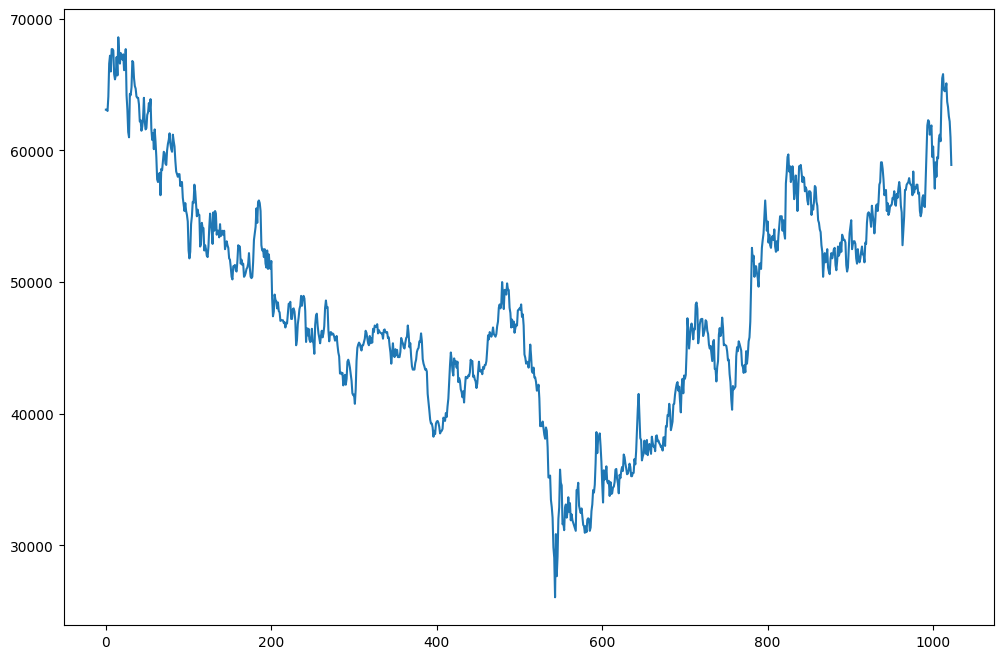

In [27]:
data = kb_df['Close'].values

plt.figure(figsize=(12, 8))
plt.plot(data)
plt.show()

In [28]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
data = np.array(data).reshape(-1,1)    # 표준화를 하기 위해 사이즈를 (-1,1)로 조정
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(data)
test_idx = int(len(scaled) * 0.8)
train = scaled[:test_idx]
test = scaled[test_idx:]

- KB Prophet

In [29]:
kb_df['ds'] = pd.to_datetime(kb_df.index)
kb_df['y'] = kb_df['Close']
kb_df[['ds', 'y']].iloc[:-10]

,ds,y
Date,,
2018-01-02,2018-01-02,63100
2018-01-03,2018-01-03,63100
2018-01-04,2018-01-04,63000
2018-01-05,2018-01-05,64100
2018-01-08,2018-01-08,66600
...,...,...
2022-02-07,2022-02-07,61200
2022-02-08,2022-02-08,60700
2022-02-09,2022-02-09,63800


DEBUG:cmdstanpy:input tempfile: /tmp/tmpn1jku9kn/9krwe58a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn1jku9kn/l6n3ukf3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52881', 'data', 'file=/tmp/tmpn1jku9kn/9krwe58a.json', 'init=/tmp/tmpn1jku9kn/l6n3ukf3.json', 'output', 'file=/tmp/tmpn1jku9kn/prophet_modelb4bq46rc/prophet_model-20230702104259.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:42:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:42:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


             ds         trend    yhat_lower    yhat_upper   trend_lower  \
0    2018-01-02  63353.746400  64069.388879  69792.600743  63353.746400   
1    2018-01-03  63295.126535  64109.673920  69546.936522  63295.126535   
2    2018-01-04  63236.506669  64001.761778  69657.921171  63236.506669   
3    2018-01-05  63177.886804  64142.816125  69429.435341  63177.886804   
4    2018-01-08  63002.027207  64007.495082  69465.964786  63002.027207   
...         ...           ...           ...           ...           ...   
1018 2022-02-17  54879.054489  55059.462568  60808.031736  54879.054489   
1019 2022-02-18  54892.394692  55157.295528  60964.876556  54892.394692   
1020 2022-02-19  54905.734894  54753.989524  60177.354717  54905.734894   
1021 2022-02-20  54919.075097  54835.114024  60203.302769  54919.075097   
1022 2022-02-21  54932.415300  55191.821009  60728.272731  54932.415300   

       trend_upper  additive_terms  additive_terms_lower  \
0     63353.746400     3521.481516     

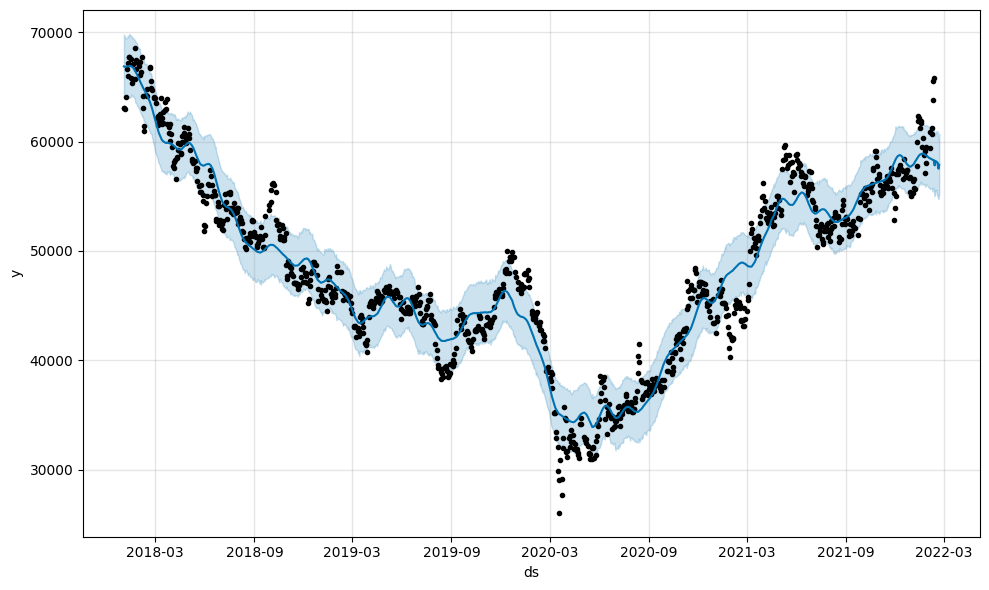

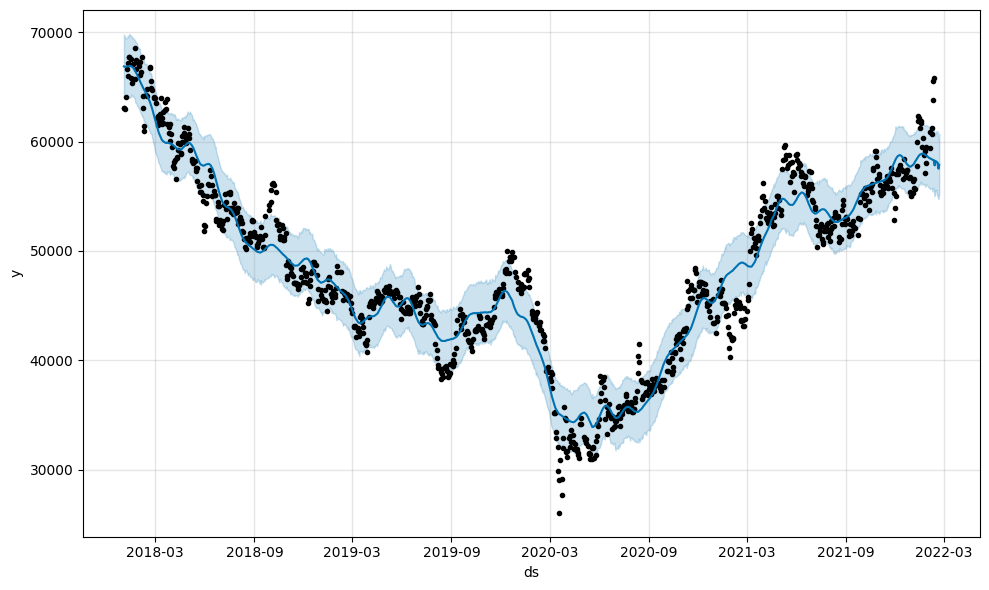

In [30]:
# prophet 모듈 세팅
from prophet import Prophet

# Day 단위로 데이터가 구성되어 있으므로, 일 단위 주기성 활성화
model = Prophet(daily_seasonality=True)

# 데이터 학습 시작 -> 기계학습
model.fit(kb_df[['ds', 'y']].iloc[:-10])

# 주가 예측 위한 날짜 데이터 세팅 -> 기존 데이터 + 향후 14일치 예측값
future = model.make_future_dataframe(periods=10)

# 주가 예측
forecast = model.predict(future)

# forecast.columns ->
'''
  Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')
'''

# 필요한 컬럼만 보기
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(11)

print(forecast)

# 모델이 제공하는 시각화
model.plot(forecast)

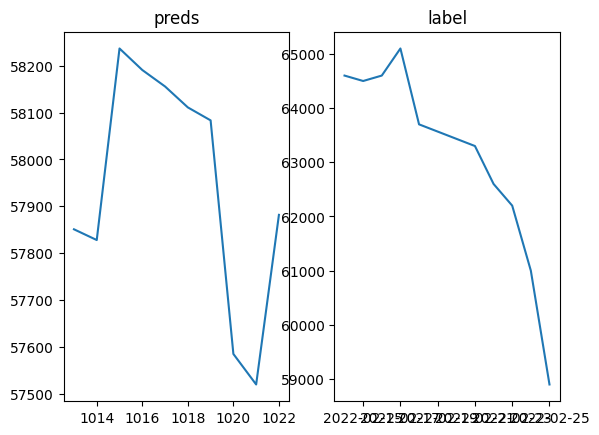

In [31]:
plt.subplot(1,2,1)
plt.plot(forecast.tail(10)['yhat'])
plt.title('preds')
plt.subplot(1,2,2)
plt.title('label')
plt.plot(kb_df.tail(10)['Close'])
plt.show()

In [32]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(11)

,ds,yhat,yhat_lower,yhat_upper
1012,2022-02-11,58312.585375,55574.830019,61142.465615
1013,2022-02-12,57850.872395,55018.285325,60614.195753
1014,2022-02-13,57827.955394,55113.417593,60482.835232
1015,2022-02-14,58236.713067,55583.089273,60863.351142
1016,2022-02-15,58190.765353,55460.622059,60959.996313
1017,2022-02-16,58155.617202,55592.102925,60790.018862
1018,2022-02-17,58111.003187,55059.462568,60808.031736
1019,2022-02-18,58083.285775,55157.295528,60964.876556
1020,2022-02-19,57584.875975,54753.989524,60177.354717
1021,2022-02-20,57519.741851,54835.114024,60203.302769


# 하나 금융 지주

In [33]:
hana_df= fdr.DataReader('086790','2018-01-01','2022-02-25')
hana_df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,49800,51100,49550,50900,569430,0.022088
2018-01-03,50000,51500,50000,51400,708652,0.009823
2018-01-04,51800,51800,50600,51300,741230,-0.001946
2018-01-05,51700,52500,51500,52300,846844,0.019493
2018-01-08,52900,54300,52600,54200,727704,0.036329
...,...,...,...,...,...,...
2022-02-21,50900,51900,50900,51400,739225,-0.013436
2022-02-22,50400,51300,50000,51200,1157939,-0.003891
2022-02-23,51900,52300,50700,50800,1004616,-0.007812


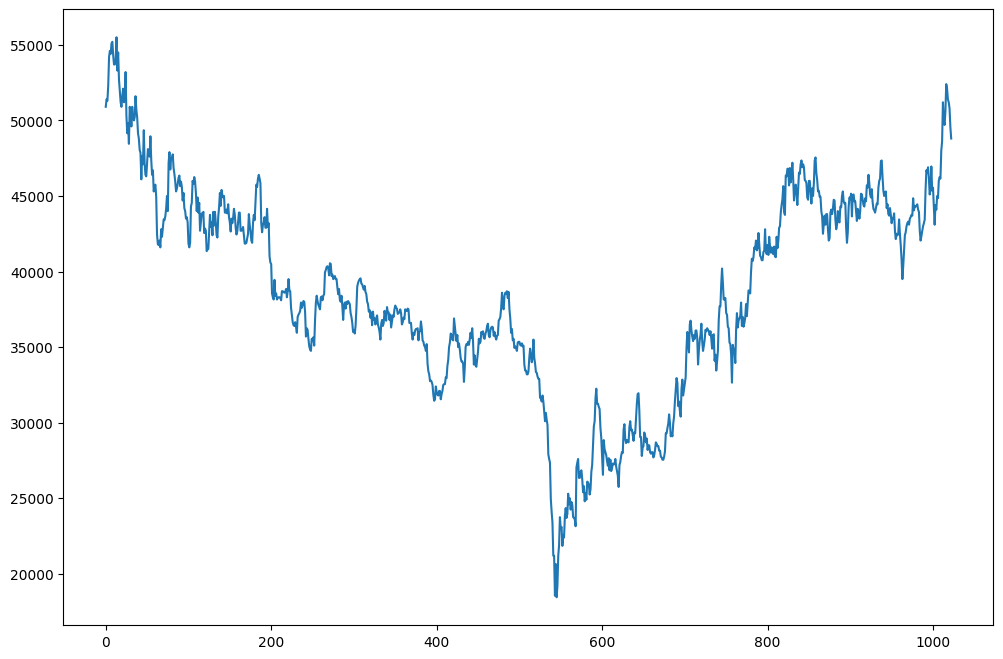

In [34]:
data = hana_df['Close'].values

plt.figure(figsize=(12, 8))
plt.plot(data)
plt.show()

In [35]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
data = np.array(data).reshape(-1,1)    # 표준화를 하기 위해 사이즈를 (-1,1)로 조정
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(data)
test_idx = int(len(scaled) * 0.8)
train = scaled[:test_idx]
test = scaled[test_idx:]

- HANA Prophet

In [36]:
hana_df['ds'] = pd.to_datetime(hana_df.index)
hana_df['y'] = hana_df['Close']
hana_df[['ds', 'y']].iloc[:-10]

,ds,y
Date,,
2018-01-02,2018-01-02,50900
2018-01-03,2018-01-03,51400
2018-01-04,2018-01-04,51300
2018-01-05,2018-01-05,52300
2018-01-08,2018-01-08,54200
...,...,...
2022-02-07,2022-02-07,46250
2022-02-08,2022-02-08,46150
2022-02-09,2022-02-09,48000


DEBUG:cmdstanpy:input tempfile: /tmp/tmpn1jku9kn/nmcyvyuz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn1jku9kn/rkm85gff.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66046', 'data', 'file=/tmp/tmpn1jku9kn/nmcyvyuz.json', 'init=/tmp/tmpn1jku9kn/rkm85gff.json', 'output', 'file=/tmp/tmpn1jku9kn/prophet_modelg14n8wzt/prophet_model-20230702104302.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:43:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:43:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


             ds         trend    yhat_lower    yhat_upper   trend_lower  \
0    2018-01-02  50918.641500  49884.874649  54654.484854  50918.641500   
1    2018-01-03  50863.123012  49939.660003  54680.494556  50863.123012   
2    2018-01-04  50807.604525  49848.328642  54481.924714  50807.604525   
3    2018-01-05  50752.086037  50013.116474  54696.677003  50752.086037   
4    2018-01-08  50585.530574  50020.983374  54559.083867  50585.530574   
...         ...           ...           ...           ...           ...   
1018 2022-02-17  43279.550497  43190.797795  47924.209707  43279.550497   
1019 2022-02-18  43284.392451  43310.184562  47981.712080  43284.392451   
1020 2022-02-19  43289.234406  43031.191117  47696.498663  43289.234406   
1021 2022-02-20  43294.076361  43068.173531  47565.431807  43294.076361   
1022 2022-02-21  43298.918315  43158.018976  47965.010779  43298.918315   

       trend_upper  additive_terms  additive_terms_lower  \
0     50918.641500     1372.165251     

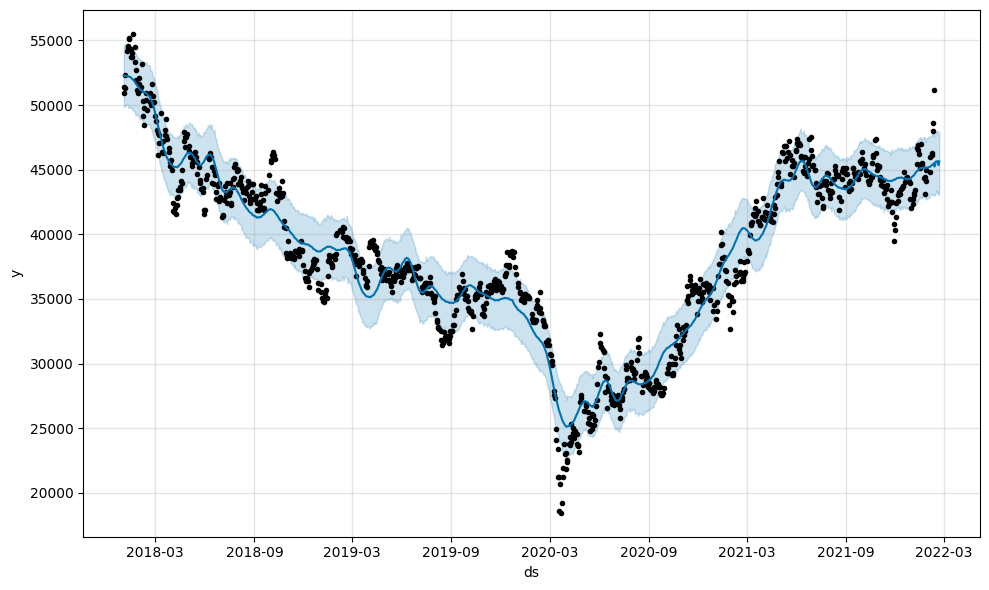

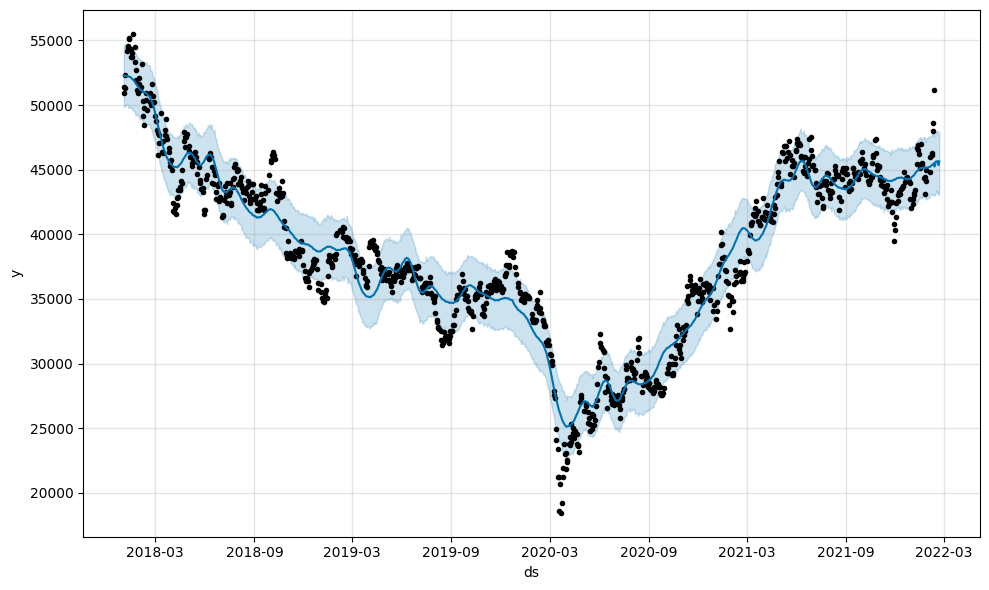

In [37]:
# prophet 모듈 세팅
from prophet import Prophet

# Day 단위로 데이터가 구성되어 있으므로, 일 단위 주기성 활성화
model = Prophet(daily_seasonality=True)

# 데이터 학습 시작 -> 기계학습
model.fit(hana_df[['ds', 'y']].iloc[:-10])

# 주가 예측 위한 날짜 데이터 세팅 -> 기존 데이터 + 향후 14일치 예측값
future = model.make_future_dataframe(periods=10)

# 주가 예측
forecast = model.predict(future)

# forecast.columns ->
'''
  Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')
'''

# 필요한 컬럼만 보기
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(11)

print(forecast)

# 모델이 제공하는 시각화
model.plot(forecast)

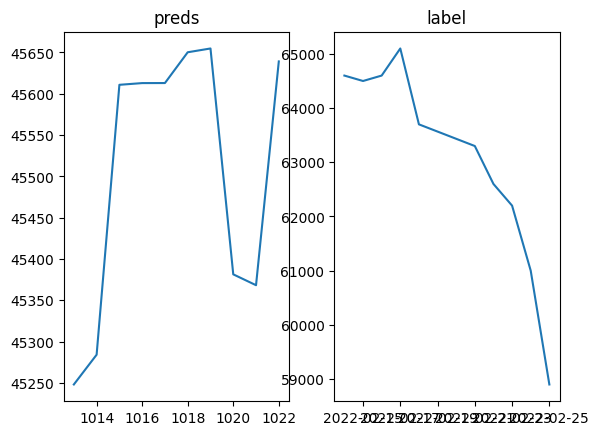

In [38]:
plt.subplot(1,2,1)
plt.plot(forecast.tail(10)['yhat'])
plt.title('preds')
plt.subplot(1,2,2)
plt.title('label')
plt.plot(kb_df.tail(10)['Close'])
plt.show()

#결론
- 그래프의 개형에 매우 유사하다
- 같은 직종이라 그런지 V자 형태의 그래프가 유사하다
- 다만 평행이동하듯이 y축값은 다르긴 하다
- 예측값과 실제값 그래프를 비교해봤을 때 크게 다르게 예측되지는 않았다.